In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
f = open('coords/coords_step0000000.dat')
line = f.readline()
N = int(line.split("\n")[0])
print(N)
ens = "NVT"
folder = "results/"
# folder = "NVE_results/"

100


In [115]:
steps0, kinetic0, potential0, total0, avg_collisions0 = np.loadtxt(folder + "state_variables.txt").transpose()
first, last = 0, 60000
delta_ts, vacf = np.loadtxt(folder + "vacf.txt").transpose()
delta_ts, vacf = delta_ts[first:last], vacf[first:last]
steps, kinetic, potential, total, avg_collisions = steps0[first:last], kinetic0[first:last], potential0[first:last], total0[first:last], avg_collisions0[first:last]

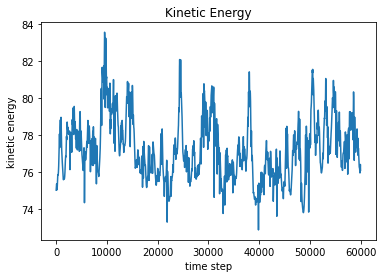

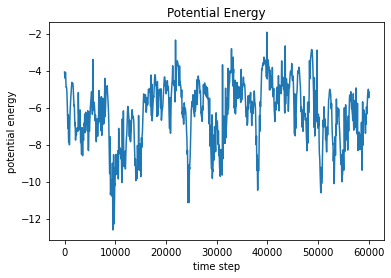

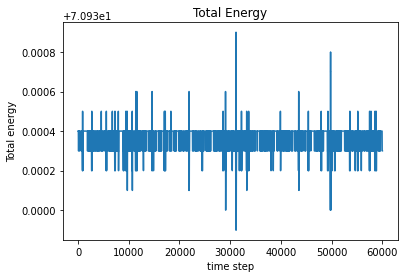

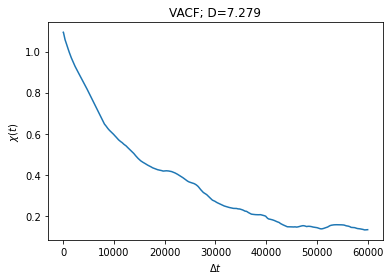

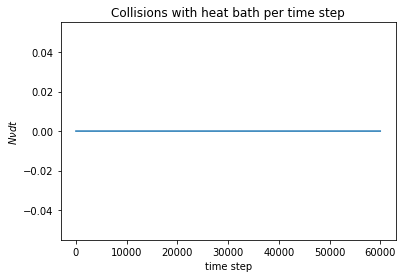

In [117]:
plt.title('Kinetic Energy')
plt.xlabel('time step')
plt.ylabel('kinetic energy')
plt.plot(steps, kinetic)
plt.savefig(folder + ens + "_kinetic.png", dpi=100)
plt.show()

plt.title('Potential Energy')
plt.xlabel('time step')
plt.ylabel('potential energy')
plt.plot(steps, potential)
plt.savefig(folder + ens + "_potential.png", dpi=100)
plt.show()

plt.title('Total Energy')
plt.xlabel('time step')
plt.ylabel('Total energy')
plt.plot(steps, total)
plt.savefig(folder + ens + "_total.png", dpi=100)
plt.show()

D = round(np.sum(vacf)*0.001/3, 3)
plt.title(f'VACF; D={D}')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\chi (t)$')
plt.plot(delta_ts, vacf)
plt.savefig(folder + ens + "_vacf_better.png", dpi=100)
plt.show()

plt.title('Collisions with heat bath per time step')
plt.xlabel('time step')
plt.ylabel(r'$N\nu dt$')
plt.plot(steps, avg_collisions)
# plt.savefig(folder + ens +"_thermostat.png", dpi=100)
plt.show()

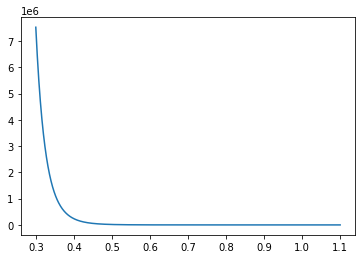

In [61]:
# analyse Lennard-Jones potential energy and force
r_max = 1.1
r = np.linspace(0.3,r_max,1000)
r_cut = 25 / 3
e_cut = (4/r_cut**6) * ((1/r_cut**6) - 1)
energy = (4/r**6) * ((1/r**6) - 1) - e_cut
plt.plot(r,energy)
# plt.axvline(r_cut)
# plt.xlim(1, r_cut)

Expected std deviation: 1.41421
Obtained std deviation: 1.4166876778038895


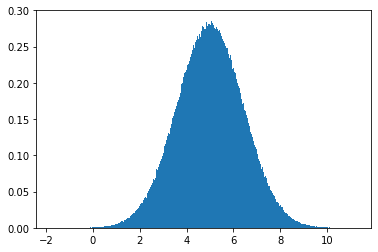

In [25]:
# test boltzmann sample generator
boltz = np.loadtxt("boltzmann.txt")
std_dev = boltz[0]
boltz = boltz[1:]
print(f'Expected std deviation: {std_dev}')
print(f'Obtained std deviation: {np.std(boltz)}')
plt.hist(boltz, density = True, bins = "auto")
plt.show()